# King County House Sales

# 1. Introduction
## Business Understanding
When done strategically, remodeling improves your home’s value and marketability. You might notice that a home that is similar to your home in age, size and layout has been appraised at a much higher value than your home. The most likely reason is that the home has been upgraded. Homes that have been upgraded with modern features or layouts attract more homebuyers and higher offers.

Updating or improving aging systems can increase energy efficiency and resale value. Because the physical characteristics of your home depreciate in value, a newer home will have a higher value than an older home. Home appraisers rate your home’s condition based on the amount and degree of repairs required. A well-maintained older home with a sound foundation and structure and functional systems will also have a higher value.

Buyers in particular should take note of your home’s age based on the quality and design of materials and fixtures. When you maintain your home from a structural and aesthetic standpoint, you improve your property value.
## Problem Statement
The business problem is to provide advice to homeowners about how home renovations might increase the estimated value of their homes using multiple linear regression to predict the estimated value of homes in King County. By analyzing various features in the houses, we provide homeowners with information on how specific home renovations may affect the value their properties.
## Main Objective
The main objective of this project is to develop a multiple linear regession model that predicts the estimated value of homes in King County. 
## Defining the metrics for success
The project would be considered a success if:
- The predictive model achieves an R-Squared value of at least 80%. This indicates that the model can explain a significant portion of the variation in the estimated home values based on the selected feature.
- The Mean Absolute Percentage Error (MAPE) of the model is less than or equal to 10%. MAPE measures the average percentage difference between the predicted and actual values. A MAPE of 10% or lower indicates that on average, the model's predictions deviate by no more than 10% from the actual values.

## Experimental Design
1. Data Collection. Here we will describe how the King County Sales dataset was obtained and any data preprocessing steps that were performed such as handling missing values, data cleaning and feature selection.
2. Exploratory Data Analysis. Here we will summarize the initial exploration and visualization of the dataset to gain insights intothe distribution of variables, identify any outliers and understand the relationships between features and the target variable.
3. Feature Engineering. Here we will detail the steps taken encoding categorical variables.
4. Model Building. Here we will outline the process of building the multiple linear regression model by selecting the relevant features, splitting the data into training and testing sets, fitting the model to the training data, and evaluating the model's performance using appropriate validation techniques.
5. Model Evaluation. Here we will discuss the interpretation of the regression coefficients and their significance in relation to the target variable.
6. Conclusion. Here we will summarize the findings from the analysis.
7. Reccomendation. Here we will give recommendations for the homeowner based on the model results.

## Data Understanding
The data that was  used in this project was collected from the King County House Sales dataset. The description of the column names can be found in column_names.md.


# 2. Data Collection

In [47]:
# importing the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [48]:
# Loading the data
house = pd.read_csv("kc_house_data.csv")
house.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [49]:
# checking the data types of the data
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [50]:
# checking the info of the data
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [51]:
# checking the description of the data
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [52]:
# checking for duplicates in the id column
house['id'].duplicated().sum()

177

In [53]:
# dropping the duplicates from id column
house = house.drop_duplicates(subset = 'id', keep = 'first')

In [54]:
# ignoring a list of features irrelevant to our analysis
droped_features = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
house_features = house.drop(droped_features, axis = 1)

In [55]:
house_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  int64  
 3   bathrooms    21420 non-null  float64
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   19067 non-null  object 
 8   condition    21420 non-null  object 
 9   grade        21420 non-null  object 
 10  yr_built     21420 non-null  int64  
 11  zipcode      21420 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 2.1+ MB


In [56]:
# Replacing missing values on the waterfront property
house['waterfront'] = house['waterfront'].fillna('NO')

In [57]:
# identifying outliers
def outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    # calculate the lower and upper bounds
    lower_bound = q1 - (1.5 * iqr * (len(data[column])/(len(data[column]) + 1)))
    upper_bound = q3 + (1.5 * iqr * (len(data[column])/(len(data[column]) + 1)))

    # Identify the outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

    return (outliers)

outliers(house_features, "sqft_living")

5        5420
70       4770
115      4380
153      5180
239      4410
         ... 
21535    4350
21545    4500
21560    4850
21574    4910
21584    4470
Name: sqft_living, Length: 579, dtype: int64

# 3. Exploratory Data Analysis

## Univariate analysis
Here we explore each variable in a dataset separately. We look at the range of values as well as the central tendency of the values. We describe the pattern of response to a variable.

In [58]:
numeric_var = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

In [59]:
# Addressing outliers using z-score method
from scipy import stats

# Convert relevant columns to numeric
house_features[numeric_var] = house_features[numeric_var].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values after converting to numeric
house_features = house_features.dropna()

# Address outliers using z-score method
z_scores = stats.zscore(house_features[numeric_var])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
house_clean = house_features[filtered_entries]

In [60]:
# Perfomrming univariate analysis of th data
def house_descriptive(data, column):
    mean = np.mean(data[column])  
    median = np.median(data[column])
    mode = stats.mode(np.array(data[column]))
    std = np.std(data[column])
    range = np.ptp(data[column])

    print(f"Mean : {mean:.3f}")
    print(f"Median : {median}")
    print(f"Mode : {mode}")
    print(f"Standard Deviation : {std:.3f}")
    print(f"Range : {range}")

In [61]:
#checking the descriptive statistics of price
house_descriptive(house_features, "price")

Mean : 542041.293
Median : 450000.0
Mode : ModeResult(mode=array([450000.]), count=array([153]))
Standard Deviation : 372823.158
Range : 7622000.0


C:\Users\JACINTA\AppData\Local\Temp\ipykernel_83152\3179703104.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(np.array(data[column]))


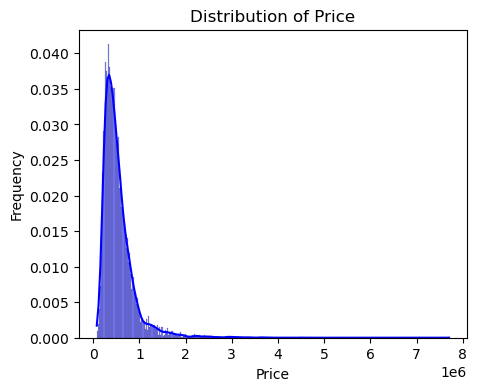

In [62]:
# Plotting the distribution of Price
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(house_features["price"], stat = 'frequency', color = "blue", kde = True, ax = ax)
ax.set_ylabel("Frequency")
ax.set_xlabel("Price")
ax.set_title("Distribution of Price")
plt.show()

In [63]:
#checking the descriptive statistics of bedrooms
house_descriptive(house_features, "bedrooms")

Mean : 3.376
Median : 3.0
Mode : ModeResult(mode=array([3], dtype=int64), count=array([8639]))
Standard Deviation : 0.928
Range : 32


C:\Users\JACINTA\AppData\Local\Temp\ipykernel_83152\3179703104.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(np.array(data[column]))


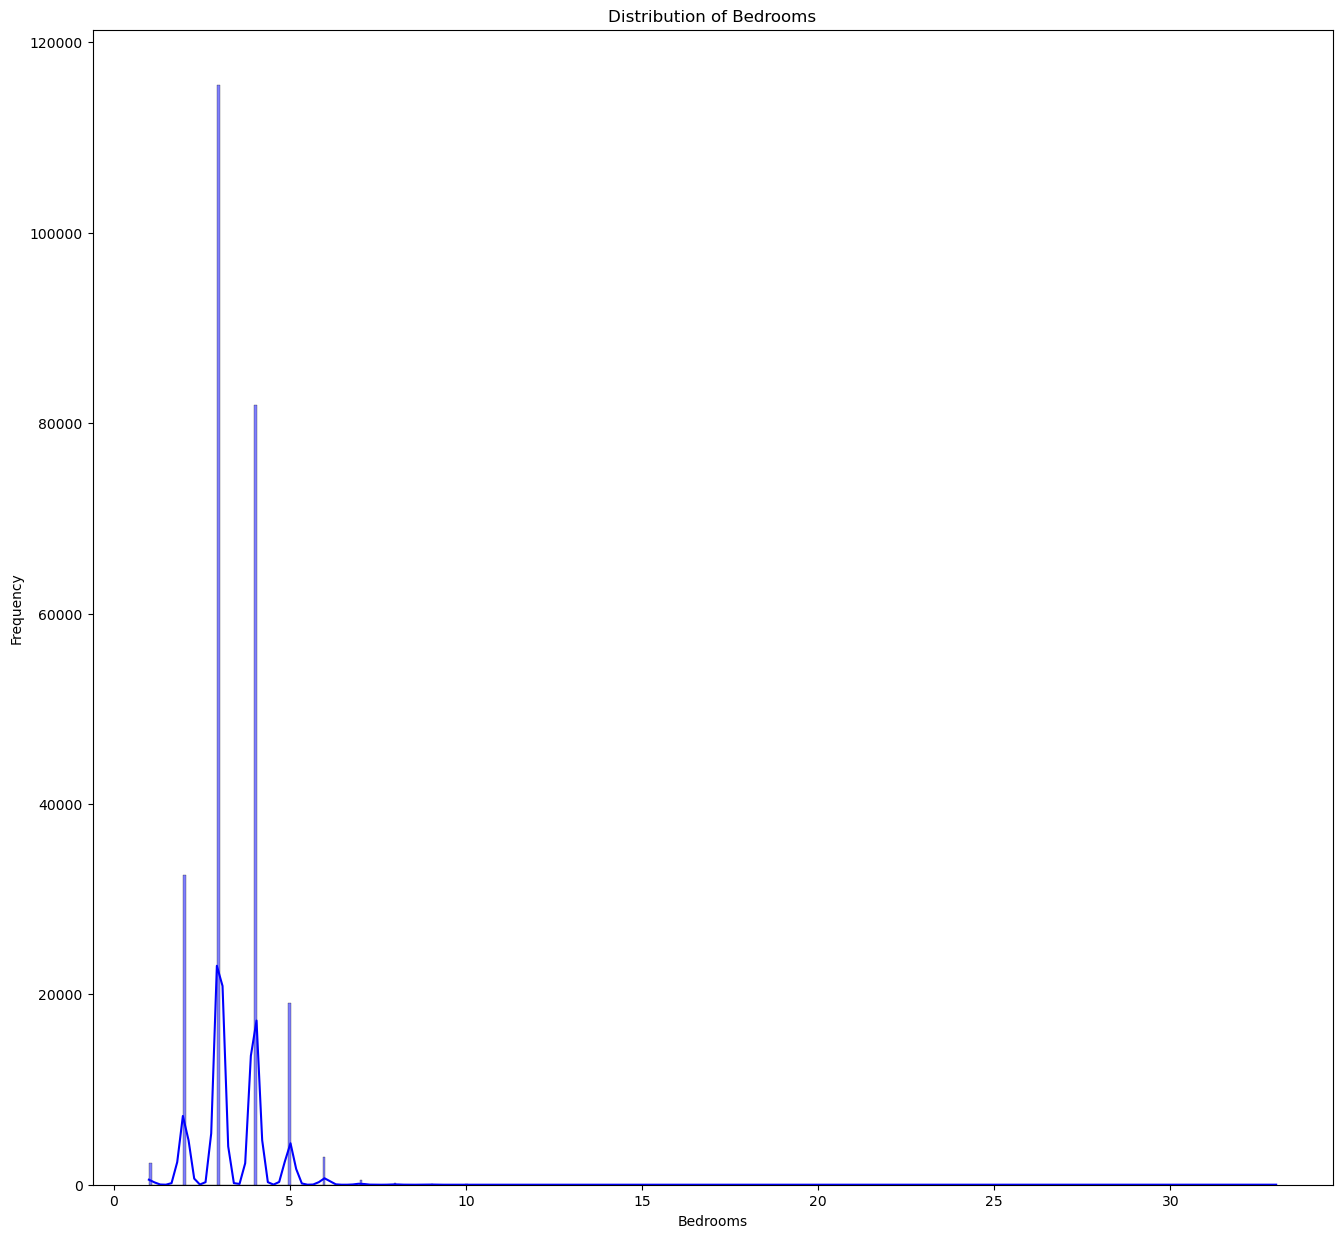

In [64]:
# Plotting the distribution of bedrooms
fig, ax = plt.subplots(figsize=(16,15))
sns.histplot(house_features["bedrooms"], stat = 'frequency', color = "blue", kde = True, ax = ax)
ax.set_ylabel("Frequency")
ax.set_xlabel("Bedrooms")
ax.set_title("Distribution of Bedrooms")
plt.show()

In [65]:
#checking the descriptive statistics of bathrooms
house_descriptive(house_features, "bathrooms")

Mean : 2.120
Median : 2.25
Mode : ModeResult(mode=array([2.5]), count=array([4818]))
Standard Deviation : 0.769
Range : 7.5


C:\Users\JACINTA\AppData\Local\Temp\ipykernel_83152\3179703104.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(np.array(data[column]))


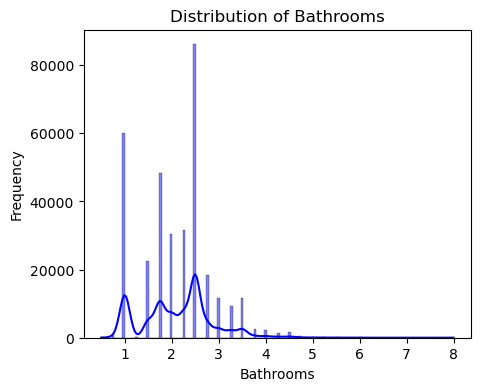

In [66]:
# Plotting the distribution of bathrooms
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(house_features["bathrooms"], stat = 'frequency', color = "blue", kde = True, ax = ax)
ax.set_ylabel("Frequency")
ax.set_xlabel("Bathrooms")
ax.set_title("Distribution of Bathrooms")
plt.show()

In [67]:
#checking the descriptive statistics of sqft_living
house_descriptive(house_features, "sqft_living")

Mean : 2085.322
Median : 1920.0
Mode : ModeResult(mode=array([1300], dtype=int64), count=array([124]))
Standard Deviation : 923.114
Range : 13170


C:\Users\JACINTA\AppData\Local\Temp\ipykernel_83152\3179703104.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(np.array(data[column]))


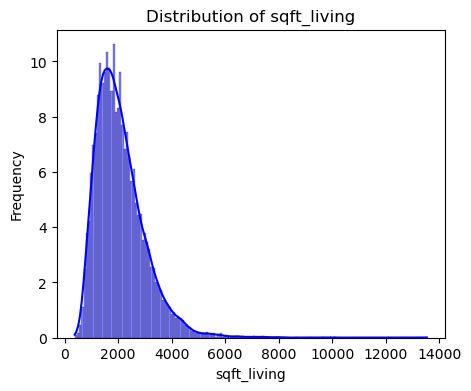

In [68]:
# Plotting the distribution of sqft_living
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(house_features["sqft_living"], stat = 'frequency', color = "blue", kde = True, ax = ax)
ax.set_ylabel("Frequency")
ax.set_xlabel("sqft_living")
ax.set_title("Distribution of sqft_living")
plt.show()

In [69]:
#checking the descriptive statistics of sqft_lot
house_descriptive(house_features, "sqft_lot")

Mean : 15097.087
Median : 7615.0
Mode : ModeResult(mode=array([5000], dtype=int64), count=array([326]))
Standard Deviation : 40921.698
Range : 1650839


C:\Users\JACINTA\AppData\Local\Temp\ipykernel_83152\3179703104.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(np.array(data[column]))


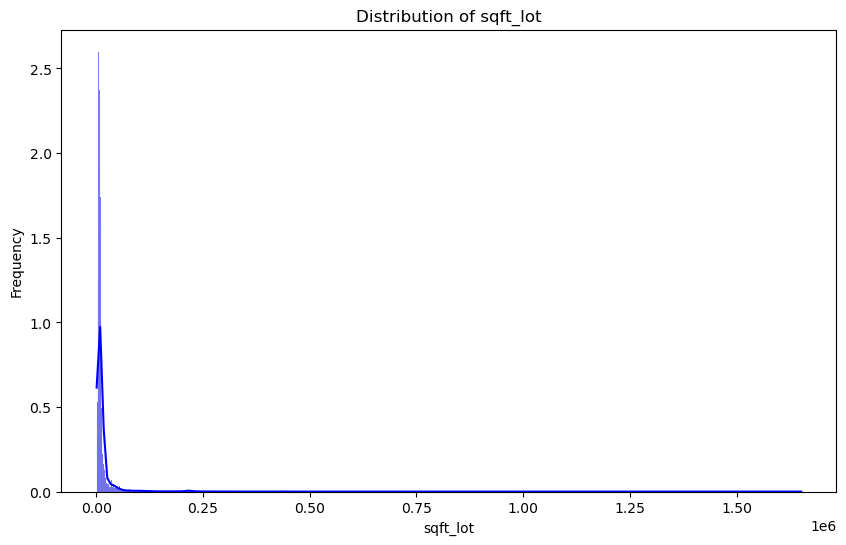

In [70]:
# Plotting the distribution of sqft_lot
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(house_features["sqft_lot"], stat = 'frequency', color = "blue", kde = True, ax = ax)
ax.set_ylabel("Frequency")
ax.set_xlabel("sqft_lot")
ax.set_title("Distribution of sqft_lot")
plt.show()

In [71]:
#checking the descriptive statistics of floors
house_descriptive(house_features, "floors")

Mean : 1.497
Median : 1.5
Mode : ModeResult(mode=array([1.]), count=array([9386]))
Standard Deviation : 0.540
Range : 2.5


C:\Users\JACINTA\AppData\Local\Temp\ipykernel_83152\3179703104.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(np.array(data[column]))


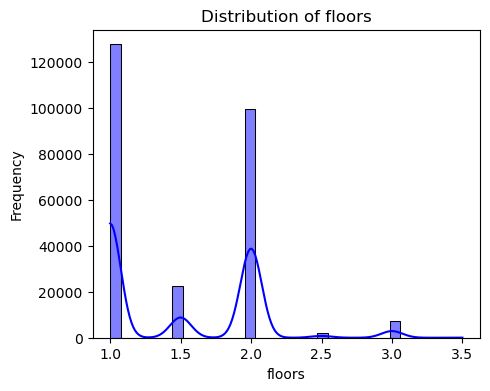

In [72]:
# Plotting the distribution of floors
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(house_features["floors"], stat = 'frequency', color = "blue", kde = True, ax = ax)
ax.set_ylabel("Frequency")
ax.set_xlabel("floors")
ax.set_title("Distribution of floors")
plt.show()

In [73]:
#checking the descriptive statistics of yr_built
house_descriptive(house_features, "yr_built")

Mean : 1971.129
Median : 1975.0
Mode : ModeResult(mode=array([2014], dtype=int64), count=array([496]))
Standard Deviation : 29.397
Range : 115


C:\Users\JACINTA\AppData\Local\Temp\ipykernel_83152\3179703104.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(np.array(data[column]))


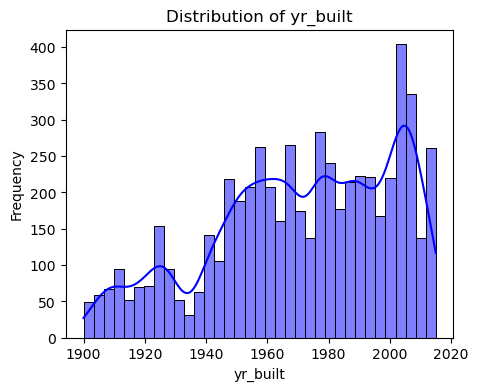

In [74]:
# Plotting the distribution of yr_built
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(house_features["yr_built"], stat = 'frequency', color = "blue", kde = True, ax=ax)
ax.set_ylabel("Frequency")
ax.set_xlabel("yr_built")
ax.set_title("Distribution of yr_built")
plt.show()

## Bivariate Analysis
Here we analyse the relationships between the features and the target variable, price.

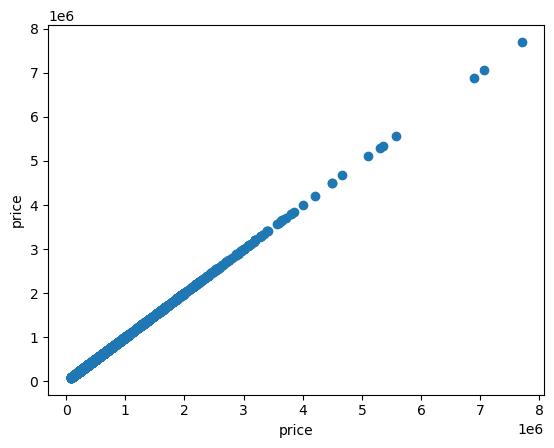

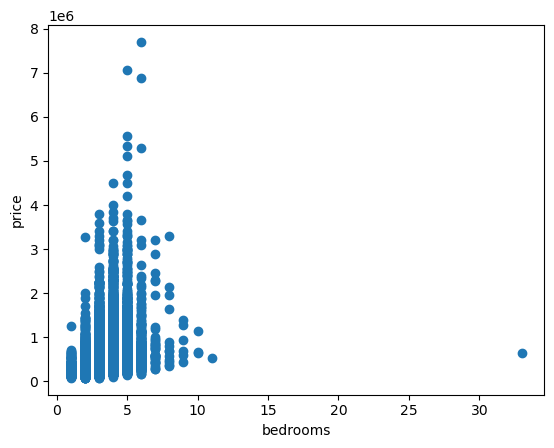

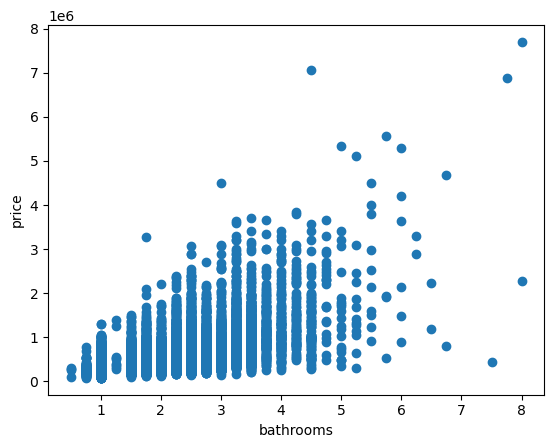

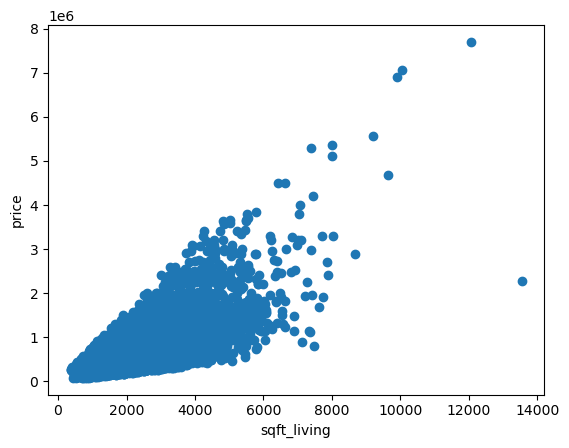

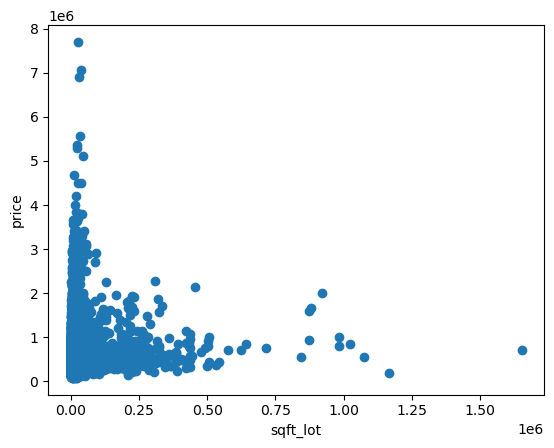

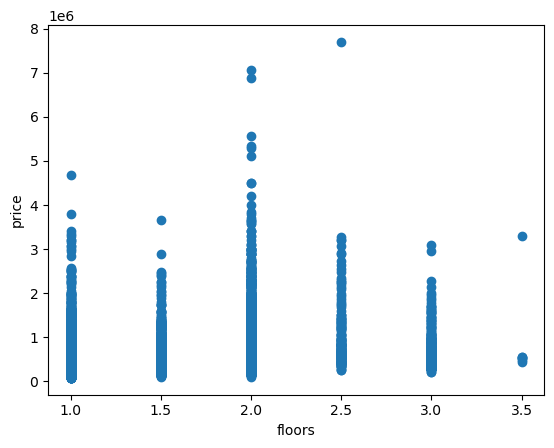

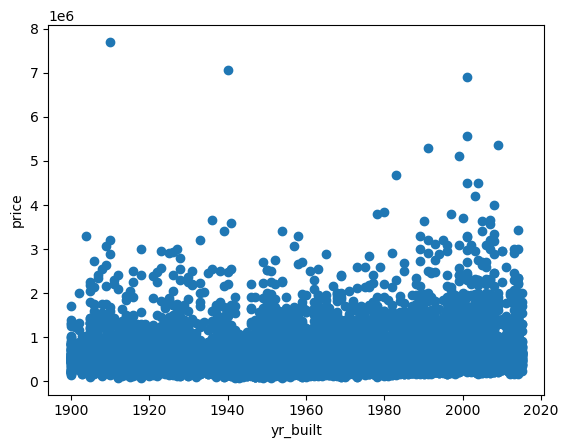

In [75]:
# checking the relationship between the numeric features and the target variable, price.
for column in numeric_var:
    plt.figure()
    plt.scatter(house[column], house['price'])
    plt.xlabel(column)
    plt.ylabel('price')
    plt.show()

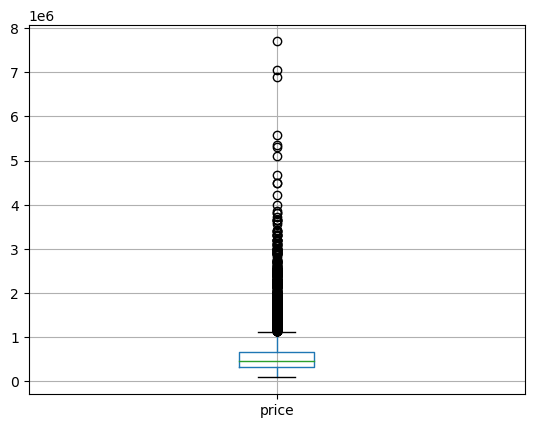

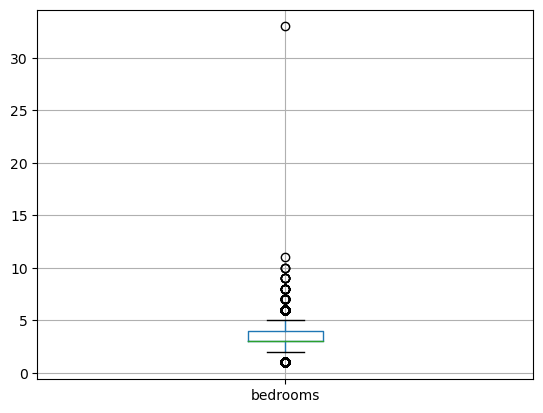

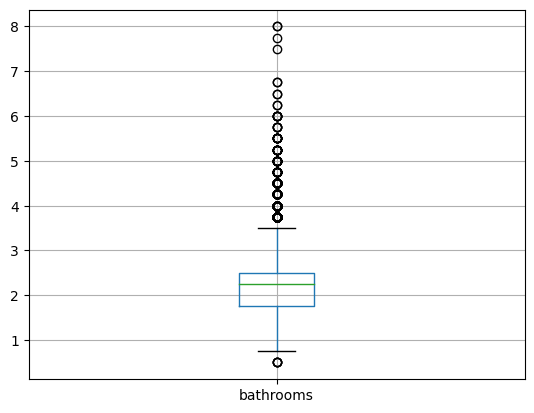

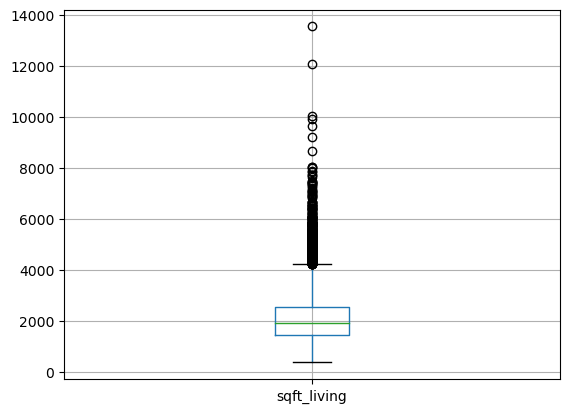

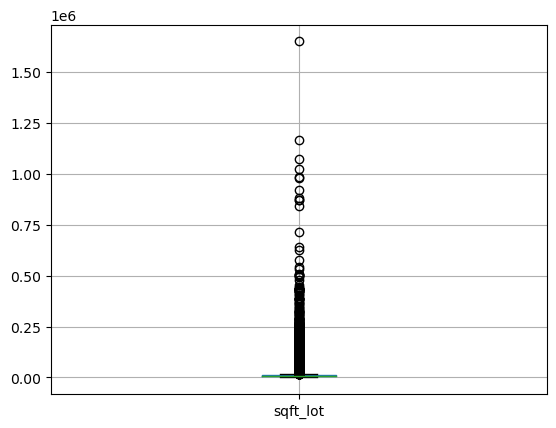

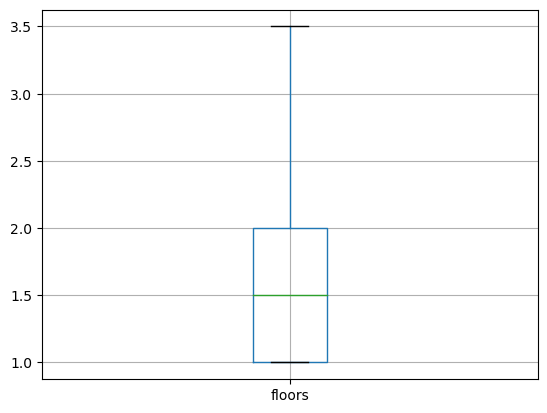

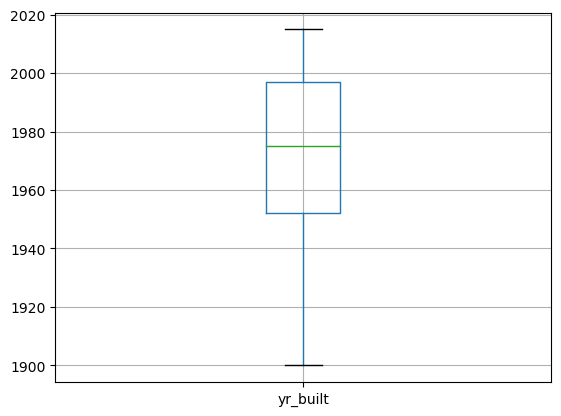

In [76]:
# Gaining insights into the distribution numeric variables through boxplots
for column in numeric_var:
    plt.figure()
    house.boxplot(column = column)
    plt.show()

# 4. Feature Engineering
One Hot Encoding

In [77]:
house_descriptive = house_features[numeric_var].describe()
house_descriptive

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,1.906700e+04,19067.00000,19067.000000,19067.000000,1.906700e+04,19067.000000,19067.000000
mean,5.420413e+05,3.37557,2.119539,2085.322389,1.509709e+04,1.496932,1971.129386
std,3.728329e+05,0.92778,0.769246,923.138659,4.092277e+04,0.540506,29.397956
min,7.800000e+04,1.00000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,3.225000e+05,3.00000,1.750000,1430.000000,5.040000e+03,1.000000,1952.000000
50%,4.500000e+05,3.00000,2.250000,1920.000000,7.615000e+03,1.500000,1975.000000
75%,6.450000e+05,4.00000,2.500000,2550.000000,1.071500e+04,2.000000,1997.000000
max,7.700000e+06,33.00000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


In [78]:
# categorical columns
categorical_columns = ['grade', 'condition', 'waterfront'].copy()
house_encoded = pd.get_dummies(house_features, columns = categorical_columns, drop_first = True)
print(house_encoded.head())

           id      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors   
1  6414100192   538000.0         3       2.25         2570      7242     2.0  \
2  5631500400   180000.0         2       1.00          770     10000     1.0   
3  2487200875   604000.0         4       3.00         1960      5000     1.0   
4  1954400510   510000.0         3       2.00         1680      8080     1.0   
5  7237550310  1230000.0         4       4.50         5420    101930     1.0   

   yr_built  zipcode  grade_11 Excellent  ...  grade_5 Fair   
1      1951    98125               False  ...         False  \
2      1933    98028               False  ...         False   
3      1965    98136               False  ...         False   
4      1987    98074               False  ...         False   
5      2001    98053                True  ...         False   

   grade_6 Low Average  grade_7 Average  grade_8 Good  grade_9 Better   
1                False             True         False           Fal

In [79]:
house_encoded.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
count,1.906700e+04,1.906700e+04,19067.00000,19067.000000,19067.000000,1.906700e+04,19067.000000,19067.000000,19067.000000
mean,4.592005e+09,5.420413e+05,3.37557,2.119539,2085.322389,1.509709e+04,1.496932,1971.129386,98077.665705
std,2.876341e+09,3.728329e+05,0.92778,0.769246,923.138659,4.092277e+04,0.540506,29.397956,53.418341
min,1.200021e+06,7.800000e+04,1.00000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,98001.000000
25%,2.124079e+09,3.225000e+05,3.00000,1.750000,1430.000000,5.040000e+03,1.000000,1952.000000,98033.000000
50%,3.905060e+09,4.500000e+05,3.00000,2.250000,1920.000000,7.615000e+03,1.500000,1975.000000,98065.000000
75%,7.334451e+09,6.450000e+05,4.00000,2.500000,2550.000000,1.071500e+04,2.000000,1997.000000,98117.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,98199.000000


In [80]:
house_encoded.corr()['price'].sort_values()

grade_7 Average       -0.316047
grade_6 Low Average   -0.206425
grade_5 Fair          -0.081955
condition_Fair        -0.050084
zipcode               -0.049358
condition_Good        -0.032252
grade_4 Low           -0.031901
id                    -0.018926
condition_Poor        -0.018414
grade_3 Poor          -0.005440
grade_8 Good          -0.000422
yr_built               0.052536
condition_Very Good    0.060511
sqft_lot               0.086155
grade_13 Mansion       0.222004
grade_9 Better         0.233698
floors                 0.257529
waterfront_YES         0.276888
grade_12 Luxury        0.301335
bedrooms               0.310158
grade_11 Excellent     0.348635
bathrooms              0.527745
sqft_living            0.704699
price                  1.000000
Name: price, dtype: float64

# 5. Model Building

In [81]:
# Checking for multicolinearity
abs(house_encoded.corr())>0.8

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode,grade_11 Excellent,...,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Fair,condition_Good,condition_Poor,condition_Very Good,waterfront_YES
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
grade_11 Excellent,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [89]:
correlation = house_encoded[numeric_var].corr()
print(correlation)

                price  bedrooms  bathrooms  sqft_living  sqft_lot    floors   
price        1.000000  0.310158   0.527745     0.704699  0.086155  0.257529  \
bedrooms     0.310158  1.000000   0.516764     0.578886  0.029366  0.182299   
bathrooms    0.527745  0.516764   1.000000     0.756113  0.084478  0.505278   
sqft_living  0.704699  0.578886   0.756113     1.000000  0.172354  0.355950   
sqft_lot     0.086155  0.029366   0.084478     0.172354  1.000000 -0.008044   
floors       0.257529  0.182299   0.505278     0.355950 -0.008044  1.000000   
yr_built     0.052536  0.157006   0.506360     0.315978  0.055254  0.489797   

             yr_built  
price        0.052536  
bedrooms     0.157006  
bathrooms    0.506360  
sqft_living  0.315978  
sqft_lot     0.055254  
floors       0.489797  
yr_built     1.000000  


In [83]:
# Modelling
features = house_encoded[numeric_var]
target = house_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Squared Error: {mse:}")
print(f"Root Mean Squared Error: {rmse:}")
print(f"R-squared: {r2:}")
print(f"Mean Absolute Percentage Error: {mape:}")

Mean Squared Error: 1.9356116417049507e-18
Root Mean Squared Error: 1.3912626070246231e-09
R-squared: 1.0
Mean Absolute Percentage Error: 1.992892004456515e-13


In [95]:
# Linear regression model
X = house_encoded[numeric_var[1:]]
y = house_encoded[numeric_var[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:}")
print(f"Root Mean Squared Error: {rmse:}")
print(f"R-squared: {r2:}")

Mean Squared Error: 59535438460.76595
Root Mean Squared Error: 243998.84930213494
R-squared: 0.5517447882532279


In [102]:
# Feature selection model to target variable with correlation
correlation_threshold = 0.5
selected_features = correlation['price'][correlation['price'].abs() > correlation_threshold].index.tolist()
X = house_encoded[selected_features]
y = house_encoded[numeric_var[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Selected Features: {selected_features}")
print(f"Mean Squared Error: {mse:}")
print(f"Root Mean Squared Error: {rmse:}")
print(f"R-squared: {r2:}")

Selected Features: ['price', 'bathrooms', 'sqft_living']
Mean Squared Error: 1.9139239671622444e-18
Root Mean Squared Error: 1.3834464092122413e-09
R-squared: 1.0


In [97]:
# Polynomial Regression model
X = house_encoded[numeric_var[1:]]
y = house_encoded[numeric_var[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
polynomial_features = PolynomialFeatures(degree=2)
X_train_polynomial = polynomial_features.fit_transform(X_train)
X_test_polynomial = polynomial_features.transform(X_test)
model3 = LinearRegression()
model3.fit(X_train_polynomial, y_train)
y_pred = model3.predict(X_test_polynomial)
mse = mean_squared_error(y_test, y_pred)
mse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Degree of Polynomial: {polynomial_features.degree}")
print(f"Mean Squared Error: {mse:}")
print(f"Root Mean Squared Error: {rmse:}")
print(f"R-squared: {r2:}")

Degree of Polynomial: 2
Mean Squared Error: 229905.97983143246
Root Mean Squared Error: 1.3834464092122413e-09
R-squared: 0.6020300083043979


# 6. Model Evaluation

In [99]:
model1.coef_

array([-6.92898232e+04,  6.85412995e+04,  3.09594996e+02, -4.13839004e-01,
        5.35364655e+04, -3.33175995e+03])

In [100]:
model2.coef_

array([ 1.00000000e+00, -6.75716494e-12,  3.72264428e-15])

In [98]:
model3.coef_

array([ 3.68585729e+00,  7.91238759e+05, -1.14617606e+06,  1.97347811e+03,
       -6.40766432e+01,  4.73236340e+05, -3.83285632e+04,  1.77861215e+03,
       -1.13342873e+04, -1.76090664e+01,  3.42813984e-01,  1.46594449e+04,
       -4.20171147e+02, -8.61459819e+03,  5.88080531e+01, -2.75434489e-01,
       -2.49477661e+04,  6.09805107e+02,  1.88325596e-02, -9.72609500e-04,
       -3.26271720e+00, -9.29750387e-01,  1.66904647e-06, -6.39255732e-02,
        3.29697917e-02,  7.29645996e+04, -3.31585199e+02,  9.59311028e+00])

# 7. Conclusions
- The basic linear regression model allows us to establish a baseline performance for predicting house prices using all the available numerical features. We use the mean squared error (MSE) and R-squared metrics to evaluate the model's performance. These metrics provide insights into how well the model fits the data and how much of the variance in the target variable is explained by the model.Mean Squared Error: 1.9356116417049507e-18
Root Mean Squared Error: 1.3912626070246231e-09
R-squared: 1.0
Mean Absolute Percentage Error: 1.992892004456515e-13
- The feature selection model has a Root Mean Squared Error of 1.38e-9 and explains 100% of the variance.
- The Linear regression model has a Root Mean Squared Error of 243998.85 and explains 55% of the variance.
- The Polynomial regression model has a Root Mean Squared Error of 1.38e-9 and explains 60% of the variance.



# 8. Reccomendations
- The model we sh